**WORMNET v3**

https://networkrepository.com/bio-WormNet-v3-benchmark.php

**About dataset**

WormNet version 3 is a novel network assisted C elegans (roundworm) hypothesis generating service.

 Significant modifications to the basic gene network were made in WormNet v3, which significantly enhanced the predictions of RNAi phenotypes.

 The server generates different gene network based hypotheses using three complementary network methods:

(i) a phenotype-centric approach to 'find new members for a pathway'

(ii) a gene-centric approach to 'infer functions from network neighbors'

(iii) a context-centric approach to find context-associated hub genes, which is a novel way to find important genes that mediate physiology within a particular context.

The dataset consists of nodes (proteins) & edges (interactions) between them.




 Research Topic!

Which network model (WS, BA ER,) best captures the centrality & connectivity patterns of the protein-protein interaction network in WormNet v3, and does the model contribute to understanding the importance & robustness of the protein network


Relevant liabraries

In [62]:
from google.colab import files
import io
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.io
from sklearn.svm import SVC
import networkx as nx
from PIL import Image
import collections

In [63]:
data = files.upload()

Saving biobenchmark.edges to biobenchmark (4).edges


In [64]:
def read_edges_file(filename):
    edges = []
    with open(filename, 'r') as file:
        for line in file:
            if not line.startswith('#'):
                parts = line.strip().split()
                if len(parts) == 2:
                    edges.append((int(parts[0]), int(parts[1])))
    return edges

def create_sparse_matrix(edges):
    num_nodes = max(max(edge) for edge in edges) + 1
    data = [1] * len(edges)
    row_indices = [edge[0] for edge in edges]
    col_indices = [edge[1] for edge in edges]

    matrix = scipy.sparse.coo_matrix((data, (row_indices, col_indices)), shape=(num_nodes, num_nodes))
    return matrix

def save_matrix_market_file(matrix, filename):
    scipy.io.mmwrite(filename, matrix)

#read the .edges file
filename = 'biobenchmark.edges'
edges = read_edges_file(filename)

#create the sparse matrix
matrix = create_sparse_matrix(edges)

#save as Matrix Market (.mtx) file
output_filename = 'biobenchmark.mtx'
save_matrix_market_file(matrix, output_filename)


The program reads an edge list from a file, uses the edge list to create a sparse adjacency matrix & then saves the matrix in the Matrix Market (.mtx) format.
More effective, adaptable network analysis & processing are made possible by transforming the edge list into a sparse matrix & storing it in the Matrix Market format.

In [65]:
num_nodes = matrix.shape[0]
num_edges = matrix.nnz // 2

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 2445
Number of edges: 39368


For network analysis, the above code extracts important information like data, row & column indexes and matrix dimensions providing also node & edges numbers. This information is critical for detailed investigation of the network structure.

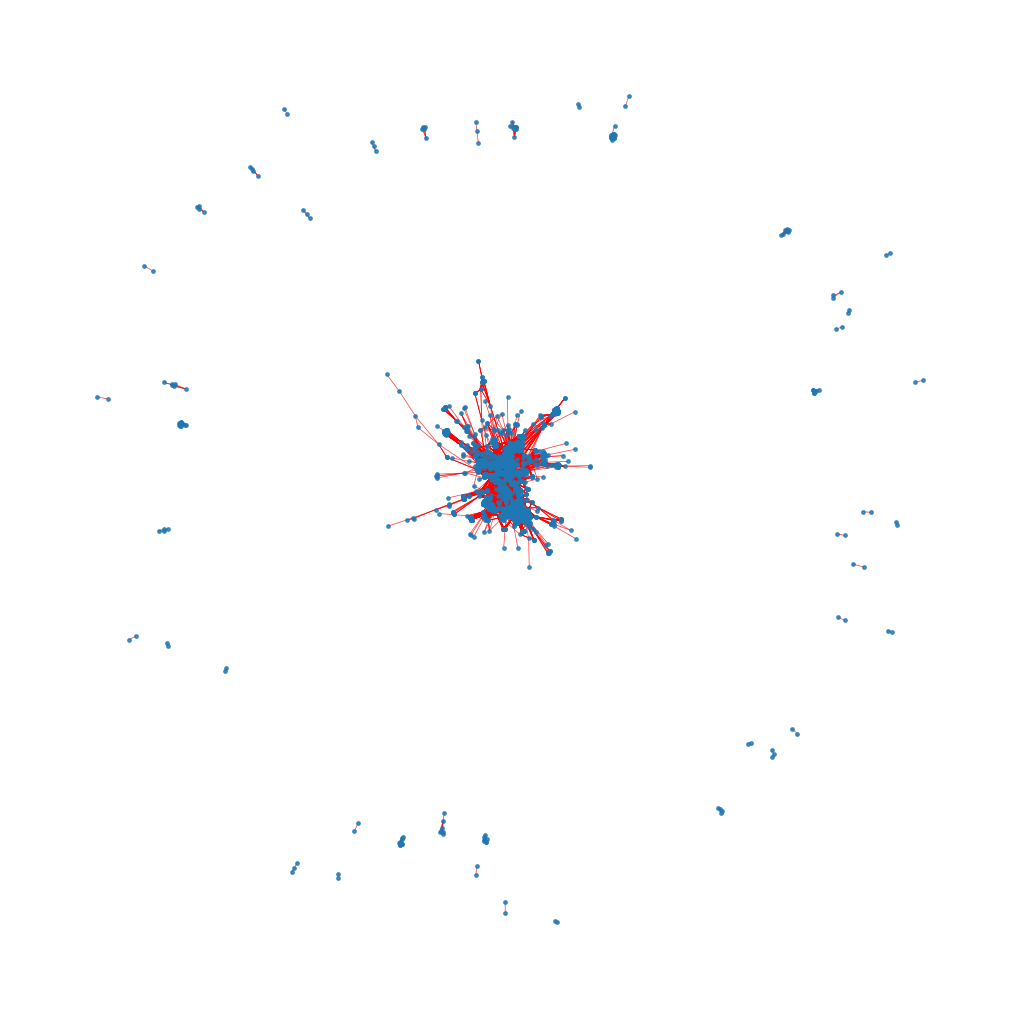

In [66]:
graph = nx.Graph(matrix)

plt.figure(figsize=(10, 10))
nx.draw(graph, with_labels=False, node_size=6, edge_color='red', alpha=0.8, width=0.5)

plt.axis('off')

# Show the plot
plt.show()

Nodes are depicted as dots, & edges as lines which show the relationships between nodes.

**Network Analysis**

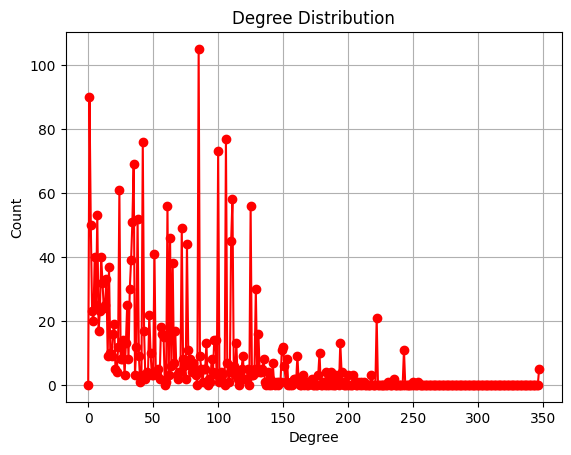

In [67]:
#Degree Distribution Analysis
degree_dist = nx.degree_histogram(graph)
degrees = range(len(degree_dist))

# Plot degree distribution
plt.plot(degrees, degree_dist, marker='o', linestyle='-', color='r')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution')
plt.grid(True)
plt.show()

In [68]:
# Connected Components Analysis
print("Number of connected components:", nx.number_connected_components(G))
largest_cc = max(nx.connected_components(G), key=len)
G_largest = G.subgraph(largest_cc)
print("Number of nodes in largest connected component:", len(G_largest.nodes()))
print("Number of edges in largest connected component:", len(G_largest.edges()))


Number of connected components: 46
Number of nodes in largest connected component: 2274
Number of edges in largest connected component: 78328


In [69]:
#  Path Analysis
source = list(G.nodes())[0]
target = list(G.nodes())[1]
shortest_path = nx.shortest_path(G, source=source, target=target)
print("Shortest path between", source, "and", target, ":", shortest_path)

Shortest path between 0 and 1 : [0, 1]


In [70]:
# 2.4 Clustering Coefficient and Density Analysis
print("Average Clustering Coefficient:", nx.average_clustering(G))
print("Network Density:", nx.density(G))

Average Clustering Coefficient: 0.8389769243091282
Network Density: 0.026352588367991057


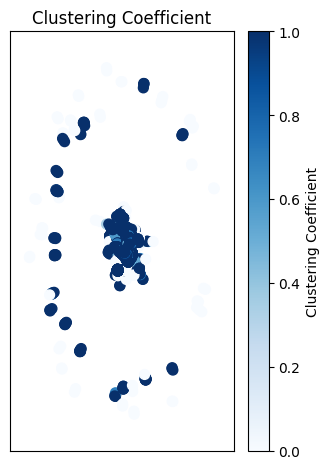

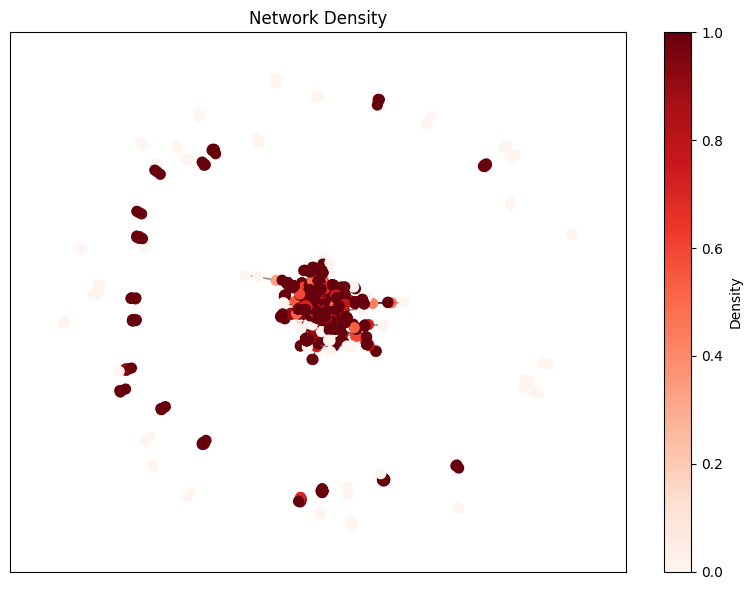

In [71]:
# Visualization for Clustering Coefficient
clustering_coefficients = nx.clustering(G)
node_colors = [clustering_coefficients[node] for node in G.nodes()]

plt.subplot(1, 2, 2)
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.Blues, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Clustering Coefficient')
plt.colorbar(nodes, orientation='vertical', label='Clustering Coefficient')

plt.tight_layout()
plt.show()

# Visualization for Network Density
plt.figure(figsize=(8, 6))
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.Reds, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Network Density')
plt.colorbar(nodes, orientation='vertical', label='Density')

plt.tight_layout()
plt.show()

In [72]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)
print("Top 5 nodes by degree centrality:", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("Top 5 nodes by betweenness centrality:", sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

# Closeness centrality
closeness_centrality = nx.closeness_centrality(G)
print("Top 5 nodes by closeness centrality:", sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


Top 5 nodes by degree centrality: [(1840, 0.14198036006546647), (1860, 0.14198036006546647), (1863, 0.14198036006546647), (1866, 0.14198036006546647), (1867, 0.14198036006546647)]
Top 5 nodes by betweenness centrality: [(562, 0.05789467342161506), (911, 0.03473168886022988), (670, 0.03417917450546862), (938, 0.026780176880269835), (1988, 0.02613225104339075)]
Top 5 nodes by closeness centrality: [(1840, 0.37270176350822604), (1860, 0.37270176350822604), (1863, 0.37270176350822604), (1866, 0.37270176350822604), (1867, 0.37270176350822604)]



Summary

The network is big & complicated with many linked components. It is distinguished by a high degree of clustering & low density. Nodes 1840, 1860, 1863, 1866 & 1867 are the most central nodes in terms of connectivity & impact within the network, whereas node 562 is crucial to sustaining overall network connectedness.

Implications

The high clustering coefficient indicates that the network tends to form clusters or communities of tightly linked nodes.
The low density suggests that many possible links between nodes remain unformed, allowing for network expansion or development.
The discovered important nodes, notably node 562, can be viewed as major influencers or bridges within the network & may be targeted for interventions or additional investigation to better understand their significance & influence on network structure as well as function.

**ER**

Erdos Renyi (ER) Model, A random network model in which there is a probability associated with each edge.


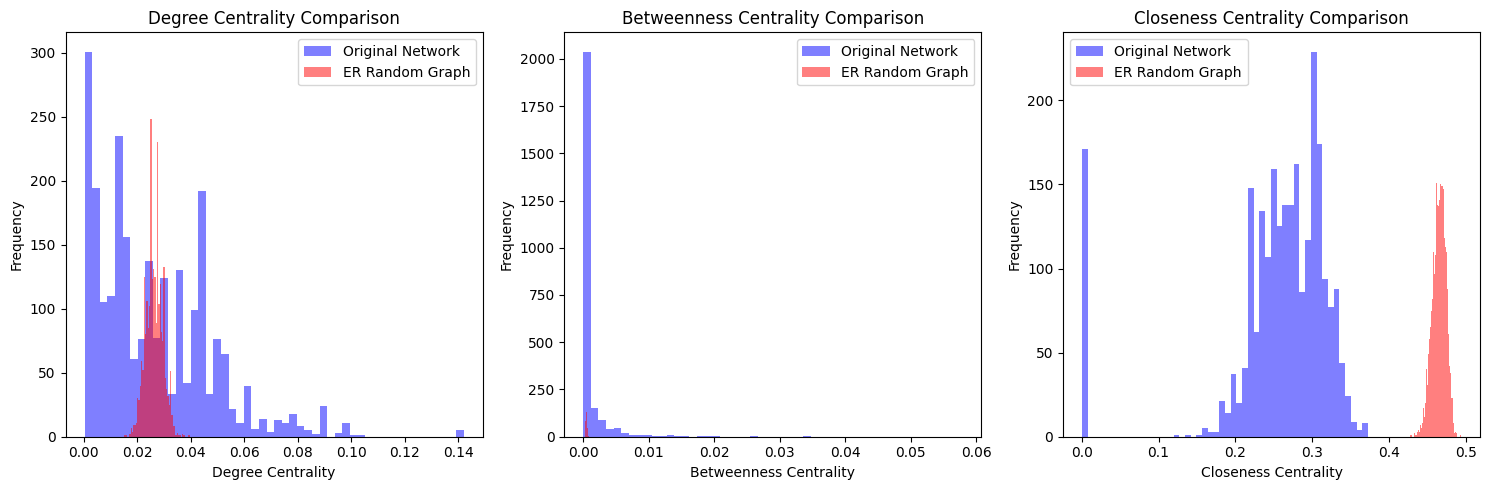

In [76]:
# Erdos Renyi (ER) Random Graph
p = len(edges) / (len(G.nodes()) * (len(G.nodes()) - 1) / 2)  # edge probability
ER_G = nx.erdos_renyi_graph(len(G.nodes()), p)

# Compute centrality measures for the original network
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Compute centrality measures for the ER random graph
ER_degree_centrality = nx.degree_centrality(ER_G)
ER_betweenness_centrality = nx.betweenness_centrality(ER_G)
ER_closeness_centrality = nx.closeness_centrality(ER_G)

# Plot histograms for degree centrality
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(list(degree_centrality.values()), bins=50, alpha=0.5, label='Original Network', color='blue')
plt.hist(list(ER_degree_centrality.values()), bins=50, alpha=0.5, label='ER Random Graph', color='red')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Comparison')
plt.legend()

# Plot histograms for betweenness centrality
plt.subplot(1, 3, 2)
plt.hist(list(betweenness_centrality.values()), bins=50, alpha=0.5, label='Original Network', color='blue')
plt.hist(list(ER_betweenness_centrality.values()), bins=50, alpha=0.5, label='ER Random Graph', color='red')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality Comparison')
plt.legend()

# Plot histograms for closeness centrality
plt.subplot(1, 3, 3)
plt.hist(list(closeness_centrality.values()), bins=50, alpha=0.5, label='Original Network', color='blue')
plt.hist(list(ER_closeness_centrality.values()), bins=50, alpha=0.5, label='ER Random Graph', color='red')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality Comparison')
plt.legend()

plt.tight_layout()
plt.show()


Degree Centrality

The blue distribution has a larger peak at a lower value than the red distribution. This suggests that in the original network, the majority of nodes have low degree centrality, however in the ER random graph, there are more nodes with greater degree centrality.

Betweenness Centrality

The blue distribution is more dispersed than the red distribution. This implies that the original network has a broader range of betweenness centrality values with some nodes having significantly greater betweenness centrality than others. The ER random graph has a more uniform distribution of betweenness centrality.

Closeness Centrality
The blue distribution has a larger peak at a higher value than the red distribution. This suggests that in the original network, the majority of nodes have a high closeness centrality, but the ER random graph has more nodes with a lower closeness centrality.

In a nutshell the distributions of the blue & red graphs indicate that the original network differs from the ER random graph. The original network seems to have more nodes with low degree centrality & high closeness centrality but the ER random graph has more nodes with high degree centrality but lower closeness centrality. This is presumably due to the original network's more clustered topology whereas the ER random graph is more random.

**BA**

A scale free network architecture known as the Barabasi Albert (BA) Model in which nodes are introduced one after the other and attach to preexisting nodes with a high degree of preference.

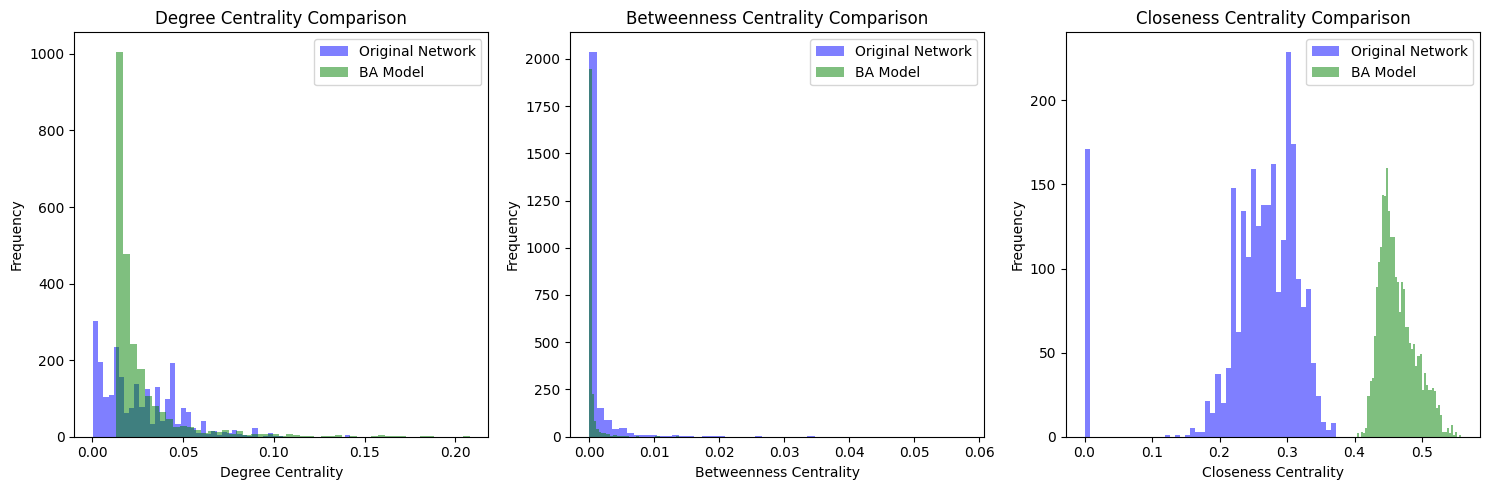

In [77]:
# Barabasi-Albert (BA)
m = len(edges) // len(G.nodes())  # number of edges to attach from a new node to existing nodes
BA_G = nx.barabasi_albert_graph(len(G.nodes()), m)

# Compute centrality measures for the original network
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Compute centrality measures for the BA model
BA_degree_centrality = nx.degree_centrality(BA_G)
BA_betweenness_centrality = nx.betweenness_centrality(BA_G)
BA_closeness_centrality = nx.closeness_centrality(BA_G)

# Plot histograms for degree centrality
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(list(degree_centrality.values()), bins=50, alpha=0.5, label='Original Network', color='blue')
plt.hist(list(BA_degree_centrality.values()), bins=50, alpha=0.5, label='BA Model', color='green')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Comparison')
plt.legend()

# Plot histograms for betweenness centrality
plt.subplot(1, 3, 2)
plt.hist(list(betweenness_centrality.values()), bins=50, alpha=0.5, label='Original Network', color='blue')
plt.hist(list(BA_betweenness_centrality.values()), bins=50, alpha=0.5, label='BA Model', color='green')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality Comparison')
plt.legend()

# Plot histograms for closeness centrality
plt.subplot(1, 3, 3)
plt.hist(list(closeness_centrality.values()), bins=50, alpha=0.5, label='Original Network', color='blue')
plt.hist(list(BA_closeness_centrality.values()), bins=50, alpha=0.5, label='BA Model', color='green')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality Comparison')
plt.legend()

plt.tight_layout()
plt.show()

Degree centrality

The BA model (green) has a greater peak at lower degree centrality values than both the original network (blue) & the ER random graph (red). This shows that the BA model produces networks with reduced degree centrality, much more so than the original network.

Betweenness Centrality

Similar to degree centrality, the BA model (green) has a stronger peak at lower betweenness centrality values than the original network (blue) & the ER random graph (red). This implies that there is a concentration of nodes with lower betweenness centrality in the BA model.

Closeness Centrality

The closeness centrality distribution of the BA model (green) is nearly identical to that of the original network (blue), with a minor movement towards lower values. This means that both the BA model and the original network have a similar distribution of closeness centrality, with the majority of nodes having a high value.

Insights

The BA model produces networks with lower degree and betweenness centrality than both the original network and the ER random graph, indicating a less centralized structure. However, in terms of proximity centrality, the BA model behaves similarly to the original network, implying that nodes in both networks are accessible relatively rapidly from other nodes.

In comparison to the original network and the ER random graph, the BA model generates less centralized networks with lower degree & betweenness centrality. However, the BA model's closeness centrality distribution closely resembles that of the original network.

**WS**

The Watts Strogatz (WS) Model is a small-world network model in which a regular lattice is the starting point & certain edges are rewired to random nodes.

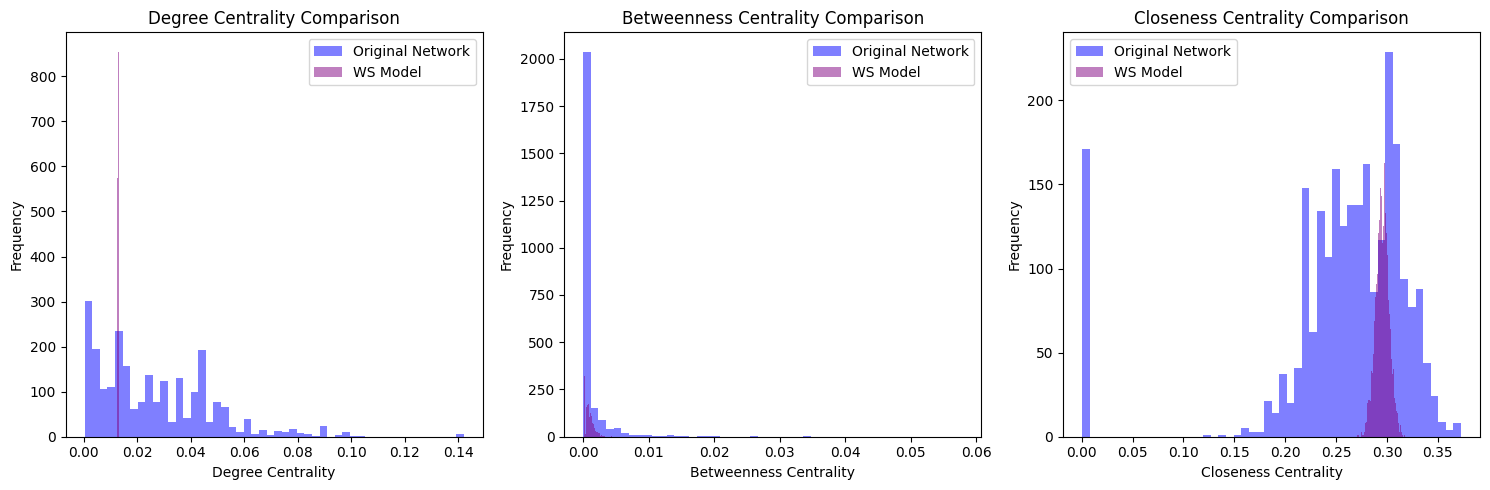

In [78]:
# Watts Strogatz (WS)
k = len(edges) // len(G.nodes())  # each node is connected to k nearest neighbors in ring topology
p = 0.05  # probability of rewiring each edge
WS_G = nx.watts_strogatz_graph(len(G.nodes()), k, p)

# Compute centrality measures for the original network
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Compute centrality measures for the WS model
WS_degree_centrality = nx.degree_centrality(WS_G)
WS_betweenness_centrality = nx.betweenness_centrality(WS_G)
WS_closeness_centrality = nx.closeness_centrality(WS_G)

# Plot histograms for degree centrality
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(list(degree_centrality.values()), bins=50, alpha=0.5, label='Original Network', color='blue')
plt.hist(list(WS_degree_centrality.values()), bins=50, alpha=0.5, label='WS Model', color='purple')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Comparison')
plt.legend()

# Plot histograms for betweenness centrality
plt.subplot(1, 3, 2)
plt.hist(list(betweenness_centrality.values()), bins=50, alpha=0.5, label='Original Network', color='blue')
plt.hist(list(WS_betweenness_centrality.values()), bins=50, alpha=0.5, label='WS Model', color='purple')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality Comparison')
plt.legend()

# Plot histograms for closeness centrality
plt.subplot(1, 3, 3)
plt.hist(list(closeness_centrality.values()), bins=50, alpha=0.5, label='Original Network', color='blue')
plt.hist(list(WS_closeness_centrality.values()), bins=50, alpha=0.5, label='WS Model', color='purple')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.title('Closeness Centrality Comparison')
plt.legend()

plt.tight_layout()
plt.show()

Degree centrality


The blue distribution (Original Network) has a bigger peak at lower degree centrality values than the purple distribution (Watts Strogatz Model). This suggests that in the original network, the majority of nodes have a low degree centrality but the Watts-Strogatz model has more nodes with a higher degree centrality.

BetweennessCentrality


The blue distribution appears to cover a greater range of betweenness centrality values than the purple distribution. This implies that the original network has a more varied distribution of betweenness centrality with some nodes having significantly greater betweenness centrality than others. In comparison, the Watts Strogatz model demonstrates a more concentrated distribution of betweenness centrality.


Closeness Centrality

The blue distribution has a greater peak at higher proximity centrality values than the purple distribution. This implies that the majority of nodes in the original network have a high closeness centrality but the Watts Strogatz model has more nodes with a lower closeness centrality. In other words, nodes in the original network can be accessed faster from other nodes than in the Watts Strogatz model.



The comparisons indicate that the Watts Strogatz model may result in a drop in proximity centrality, a more concentrated distribution of betweenness centrality & an increase in degree centrality. This implies that certain nodes in the Watts Strogatz model may be more difficult to access compared to other nodes, there may be fewer nodes that link many areas of the network as well as may be more nodes with a large number of connections.


Compared to the original network, the Watts Strogatz model has a lower proximity centrality, a more concentrated betweenness centrality distribution &a higher degree centrality.

In terms of the study topic, yes the choice of model may considerably contribute to understanding the relevance & resilience of the protein network. Here's how each model's attributes connect to these factors;


Comparing the centrality metrics (degree, betweenness, and closeness centrality) to the original network WormNet v3

The ER Random Graph (Red Distribution) is the least comparable to WormNet v3, with higher degree centrality & a distinct distribution of betweenness centrality.

Importance -  The uniform degree centrality implies that certain highly linked nodes are not as important.

Robustness - Because of their uniform degree distribution, ER networks are less resilient to random node failure.


BA Model (Green Distribution) Shows some similarities but also substantial variations from WormNet v3. While the proximity centrality distribution is comparable to WormNet v3, the degree & betweenness centralities are significantly lower in the BA model.

Importance - The presence of hub nodes demonstrates their vital importance in the network structure.

Robustness - Because of their scale free nature, BA networks are resistant to random failures but are vulnerable to targeted hub assaults.


WS Network (Purple Distribution) Has the greatest similarities to WormNet v3. The proximity centrality distributions are extremely similar & while WormNet v3 has a somewhat bigger betweenness centrality distribution, the overall structure appears to be comparable.

Importance - Similar proximity centrality signifies efficient information flow & more value for core nodes.
Robustness - WS networks withstand random failures but are vulnerable to targeted assaults on heavily linked nodes.

In conclusion, the WS Network is the most similar in terms of overall structural traits as measured by centrality measures. This implies that the structure of WormNet v3 may have small world traits similar to those reported in the Watts Strogatz model.BA model, on the other hand shares certain characteristics but has a distinct network structure with lower degree & betweenness centralities, implying a less hierarchical & more random structure than WormNet v3.

The WS Network may provide vital insights on the protein network's durability and relevance since its shape is more akin to WormNet v3 perhaps showing efficient information transfer & resilience to random errors.

The BA Model predicts the presence of hub nodes, which play an important role in the network's topology & may be key to the network's resilience against random failures but vulnerable to targeted assaults.

As a result, by comparing these models to WormNet v3 one can gain insights into the protein network's structural characteristics, the importance of specific nodes & its resilience to various types of failures which can be critical for understanding the network's functionality & stability in biological systems.
